In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


#import warnings
#warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('/Users/ting/Desktop/CodeOp/group_project_codeop/data/pollution_us_2000_2016.csv')

In [4]:
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In this dataset we have data about four major pollutants (Nitrogen Dioxide -- NO2, Sulphur Dioxide -- SO2, Carbon Monoxide -- CO and Ozone -- O3) for every day from 2000 - 2016 in different locations within the USA. 

We also have information on AQI, or Air Quality Index. The U.S. AQI is EPA’s index for reporting air quality.

The EPA website (https://www.airnow.gov/aqi/aqi-basics/) states: 
> Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

>For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain sensitive groups of people, then for everyone as AQI values get higher.

In [5]:
data.shape

(1746661, 29)

In [6]:
data['State'].unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Country Of Mexico', 'Arkansas', 'Oregon', 'Wyoming',
       'North Dakota', 'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii',
       'Minnesota', 'New Mexico', 'Rhode Island', 'South Dakota', 'Utah',
       'Alabama', 'Washington', 'Alaska'], dtype=object)

In [7]:
data[data['State'] == 'Virginia'].shape

(36422, 29)

In [8]:
data[data['State'] == 'District Of Columbia'].shape

(25696, 29)

In [9]:
data[data['State'] == 'Maryland'].shape

(23538, 29)

In [10]:
data[data['State'] == 'Virginia'].isna().sum()

Unnamed: 0               0
State Code               0
County Code              0
Site Num                 0
Address                  0
State                    0
County                   0
City                     0
Date Local               0
NO2 Units                0
NO2 Mean                 0
NO2 1st Max Value        0
NO2 1st Max Hour         0
NO2 AQI                  0
O3 Units                 0
O3 Mean                  0
O3 1st Max Value         0
O3 1st Max Hour          0
O3 AQI                   0
SO2 Units                0
SO2 Mean                 0
SO2 1st Max Value        0
SO2 1st Max Hour         0
SO2 AQI              18211
CO Units                 0
CO Mean                  0
CO 1st Max Value         0
CO 1st Max Hour          0
CO AQI               18208
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [12]:
data.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [13]:
data.isna().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [14]:
# Only dmv Dataset
dmv = data[data.State.isin(['District Of Columbia', 'Maryland', 'Virginia'])].copy()

In [15]:
dmv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85656 entries, 39766 to 1746242
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         85656 non-null  int64  
 1   State Code         85656 non-null  int64  
 2   County Code        85656 non-null  int64  
 3   Site Num           85656 non-null  int64  
 4   Address            85656 non-null  object 
 5   State              85656 non-null  object 
 6   County             85656 non-null  object 
 7   City               85656 non-null  object 
 8   Date Local         85656 non-null  object 
 9   NO2 Units          85656 non-null  object 
 10  NO2 Mean           85656 non-null  float64
 11  NO2 1st Max Value  85656 non-null  float64
 12  NO2 1st Max Hour   85656 non-null  int64  
 13  NO2 AQI            85656 non-null  int64  
 14  O3 Units           85656 non-null  object 
 15  O3 Mean            85656 non-null  float64
 16  O3 1st Max Value

In [16]:
dmv.State.unique()

array(['District Of Columbia', 'Virginia', 'Maryland'], dtype=object)

In [17]:
#dropping "Unnamed: 0" column
dmv = dmv.drop(['Unnamed: 0'], axis=1)

In [18]:
dmv.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
39766,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,Parts per billion,26.541667,...,Parts per billion,11.250000,33.0,15,47.0,Parts per million,2.062500,4.1,3,NaN
39767,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,Parts per billion,26.541667,...,Parts per billion,11.250000,33.0,15,47.0,Parts per million,2.005263,3.6,5,41.0
39768,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,Parts per billion,26.541667,...,Parts per billion,11.225000,19.0,17,NaN,Parts per million,2.062500,4.1,3,NaN
39769,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,Parts per billion,26.541667,...,Parts per billion,11.225000,19.0,17,NaN,Parts per million,2.005263,3.6,5,41.0
39770,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-02,Parts per billion,14.958333,...,Parts per billion,7.791667,11.0,0,16.0,Parts per million,0.658333,2.6,1,NaN


In [19]:
dmv['Date Local'].nunique()

5940

In [20]:
dmv['Date Local'].dtype

dtype('O')

In [21]:
dmv['Date Local'] = pd.to_datetime(dmv['Date Local'], yearfirst=True)

In [22]:
dmv['Date Local'].dtype

dtype('<M8[ns]')

In [23]:
#from kaggle california dataset

# Temporary NA fix
#dmv = dmv.dropna(axis='rows')

# Missing Values
#miss = dmv.isnull().sum().reset_index()
#miss.columns = ['Column','Missing Count']

# Time Frames of Interest
dmv["Day of Year"] = dmv['Date Local'].dt.dayofyear # Day of Year
dmv["Weekday"] = dmv['Date Local'].dt.weekday
dmv["Month"] = dmv['Date Local'].dt.month

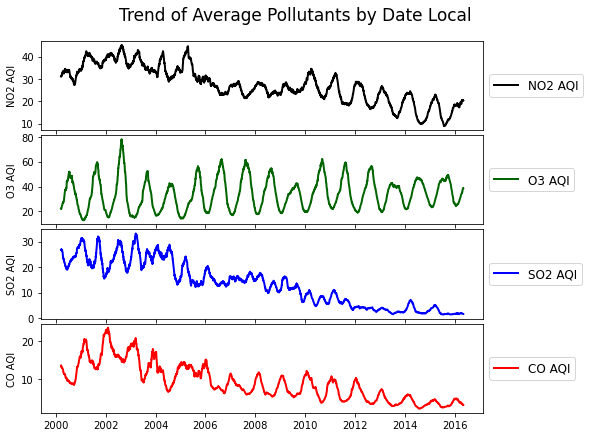

In [24]:
from IPython.display import display
import plotly.graph_objects as go
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

cols = ["black","darkgreen","blue","red"]
polldata= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]
# Plotter
def row_plots(data, time, rol_window):
    f, axarr = plt.subplots(len(data), sharex=True, squeeze=True)
    for index, x in enumerate(data):
        plot1 = dmv[[x,time]].groupby([time]).mean()
        plot1[x] = plot1[x].rolling(window = rol_window).mean()
        axarr[index].set_ylabel("{}".format(x))
        axarr[index].plot(plot1, color=cols[index],label=x,linewidth=2)
        axarr[index].legend(fontsize='large', loc='center left',
                            bbox_to_anchor=(1, 0.5))
    plt.tight_layout(pad=0)
    plt.subplots_adjust(top=0.90)
    plt.suptitle("Trend of Average Pollutants by {}".format(time),fontsize=17)
    plt.show()
    
row_plots(data=polldata, time= "Date Local", rol_window=80)

Note: credit code to https://www.kaggle.com/code/nicapotato/searching-for-answers-california-pollution

Note: Looks like the data for top 4 sites and top 4 cities is incomplete. Maybe the first of the two chart groups is most useful. It does indicate seasonality and on first glance it looks like there could be correlations between when certain gases have a peak or trough. 

#### We should look at monthly averages to get a sense of when different gas concentrations peak, maybe? 

The columns 'NO2 Units', 'SO2 Units', 'CO Units', and 'O3 Units' do not contain unique values but are rather just the same information repeated in each row. 'NO2 Units' and 'SO2 Units' are in parts per billion, and 'CO Units' and 'O3 Units' are in parts per million. These columns won't be useful to us in any kind of modeling or correlation, so we should drop them. We can rename the other columns about each gas so that the column name includes "ppb" for "parts per billion" and "ppm" for "parts per million."

In [25]:
dmv['NO2 Units'].unique()

array(['Parts per billion'], dtype=object)

In [26]:
#dropping 'NO2 Units', 'SO2 Units', 'CO Units', and 'O3 Units' columns
dmv = dmv.drop(['NO2 Units', 'SO2 Units', 'CO Units', 'O3 Units'], axis=1)


In [27]:
#renaming columns
dmv.rename(columns={"NO2 Mean": "NO2_Mean_in_ppb",
                    "NO2 1st Max Value": "NO2_1st_Max_Value_in_ppb",
                    "NO2 1st Max Hour": "NO2_1st_Max_Hour_in_ppb",
                    "SO2 Mean": "SO2_Mean_in_ppb",
                    "SO2 1st Max Value": "SO2_1st_Max_Value_in_ppb", 
                    "SO2 1st Max Hour": "SO2_1st_Max_Hour_in_ppb",
                    "CO Mean" : "CO_Mean_in_ppm",
                    "CO 1st Max Value" : "CO_1st_Max_Value_in_ppm",
                    "CO 1st Max Hour" : "CO_1st_Max_Hour_in_ppm",
                    "O3 Mean" : "O3_Mean_in_ppm",
                    "O3 1st Max Value" : "O3_1st_Max_Value_in_ppm",
                    "O3 1st Max Hour" : "O3_1st_Max_Hour_in_ppm",
                   })

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2_Mean_in_ppb,NO2_1st_Max_Value_in_ppb,...,SO2_1st_Max_Value_in_ppb,SO2_1st_Max_Hour_in_ppb,SO2 AQI,CO_Mean_in_ppm,CO_1st_Max_Value_in_ppm,CO_1st_Max_Hour_in_ppm,CO AQI,Day of Year,Weekday,Month
39766,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,26.541667,39.0,...,33.0,15,47.0,2.062500,4.10,3,NaN,1,5,1
39767,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,26.541667,39.0,...,33.0,15,47.0,2.005263,3.60,5,41.0,1,5,1
39768,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,26.541667,39.0,...,19.0,17,NaN,2.062500,4.10,3,NaN,1,5,1
39769,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,26.541667,39.0,...,19.0,17,NaN,2.005263,3.60,5,41.0,1,5,1
39770,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-02,14.958333,22.0,...,11.0,0,16.0,0.658333,2.60,1,NaN,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746238,51,87,14,2401 HARTMAN STREET MATH & SCIENCE CTR,Virginia,Henrico,East Highland Park,2016-02-28,11.141667,24.5,...,0.9,20,NaN,0.337500,0.50,2,6.0,59,6,2
1746239,51,87,14,2401 HARTMAN STREET MATH & SCIENCE CTR,Virginia,Henrico,East Highland Park,2016-02-29,10.913636,33.7,...,0.9,20,0.0,0.299583,0.76,21,NaN,60,0,2
1746240,51,87,14,2401 HARTMAN STREET MATH & SCIENCE CTR,Virginia,Henrico,East Highland Park,2016-02-29,10.913636,33.7,...,0.9,20,0.0,0.266667,0.40,22,5.0,60,0,2
1746241,51,87,14,2401 HARTMAN STREET MATH & SCIENCE CTR,Virginia,Henrico,East Highland Park,2016-02-29,10.913636,33.7,...,0.6,8,NaN,0.299583,0.76,21,NaN,60,0,2


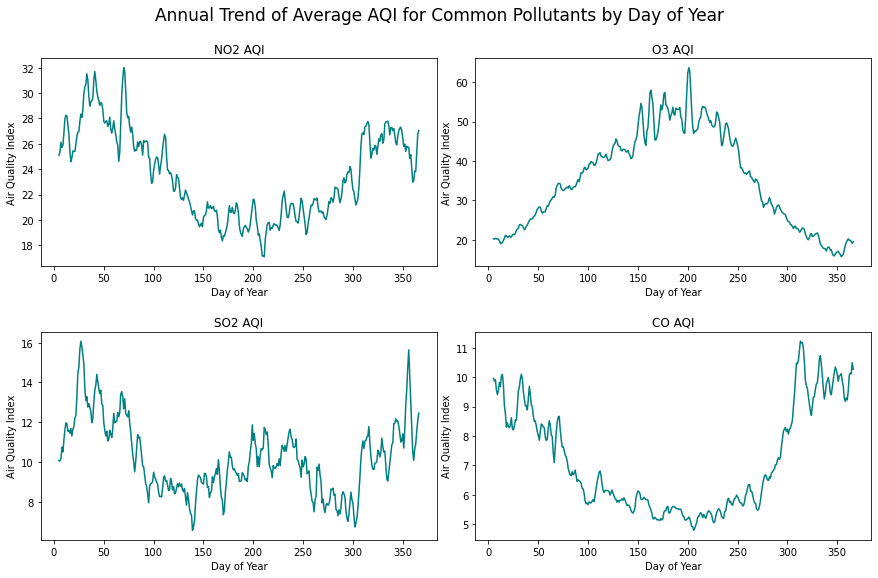

In [28]:
#more borrowed code from from kaggle california dataset: 
#https://www.kaggle.com/code/nicapotato/searching-for-answers-california-pollution

# Plot Mega-Helper
def annual_trend_plot(time, rol_window):
    plt.figure(figsize=(12,8))    
    for var,plot in [('NO2 AQI',221), ('O3 AQI',222),('SO2 AQI',223),("CO AQI",224)]:
        plt.subplot(plot)
        plot1 = dmv[[var,time]].groupby([time]).mean()
        plot1[var] = plot1[var].rolling(window = rol_window).mean()
        plt.plot(plot1, color='teal', label=var)
        plt.title(var)
        #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          #fancybox=True, shadow=True, ncol=4)
        plt.title(var)
        plt.xlabel(time)
        plt.ylabel("Air Quality Index")
    plt.tight_layout(pad=0, w_pad=0.5, h_pad=2.5)
    plt.subplots_adjust(top=0.89)
    plt.suptitle("Annual Trend of Average AQI for Common Pollutants by {}".format(time),fontsize=17)
    plt.show()

annual_trend_plot(time="Day of Year", rol_window=5)

Month may be a better date unit to use in this type of visual. 

You can see that there's a trough in the middle of the year...summertime...for NO2...is that due to less gas being burned for heat, maybe? The Ozone (O3) peaks in the summertime, in contrast. Does heat play a role in trapping it closer to the earth's surface? Sulfur dioxide maybe sees high points in the winter. Carbon monoxide is lowest in the summertime. 

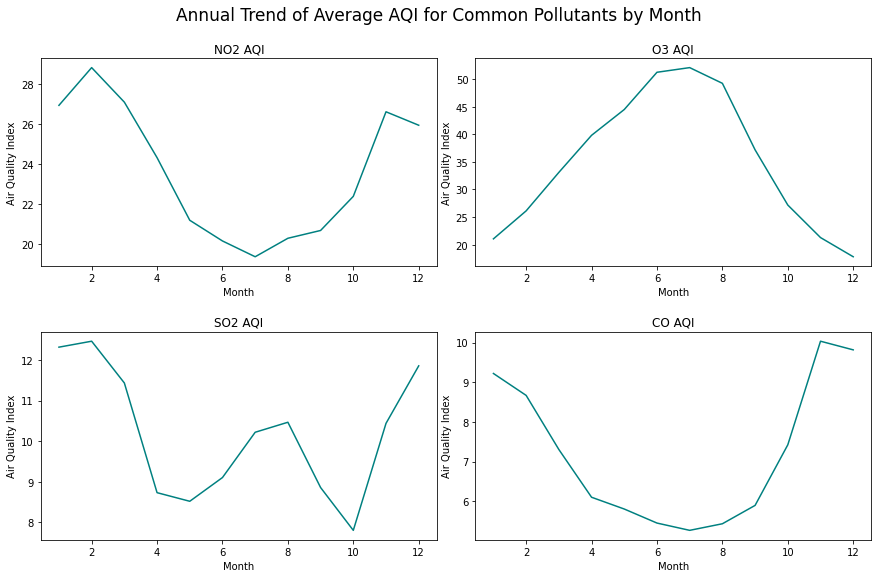

In [29]:
annual_trend_plot(time="Month", rol_window=1)

It would be cute if i could figure out how to use month names instead of numbers, but not a big deal. Also to include tick marks for all 12 months, maybe. 

In [30]:
#drop state code and county code? 
#rename District of Columbia to DC? For county also? 
#should I try to get info about particulate matter to match up with this? 

In [31]:
#investigate NaNs
dmv.isna().sum()

State Code               0
County Code              0
Site Num                 0
Address                  0
State                    0
County                   0
City                     0
Date Local               0
NO2 Mean                 0
NO2 1st Max Value        0
NO2 1st Max Hour         0
NO2 AQI                  0
O3 Mean                  0
O3 1st Max Value         0
O3 1st Max Hour          0
O3 AQI                   0
SO2 Mean                 0
SO2 1st Max Value        0
SO2 1st Max Hour         0
SO2 AQI              42812
CO Mean                  0
CO 1st Max Value         0
CO 1st Max Hour          0
CO AQI               42820
Day of Year              0
Weekday                  0
Month                    0
dtype: int64

We still have a lot of missing values for SO2 AQI and CO AQI. 

AirNow Technical Assistance document: https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf

This document describes the following formula for calculating AQI:

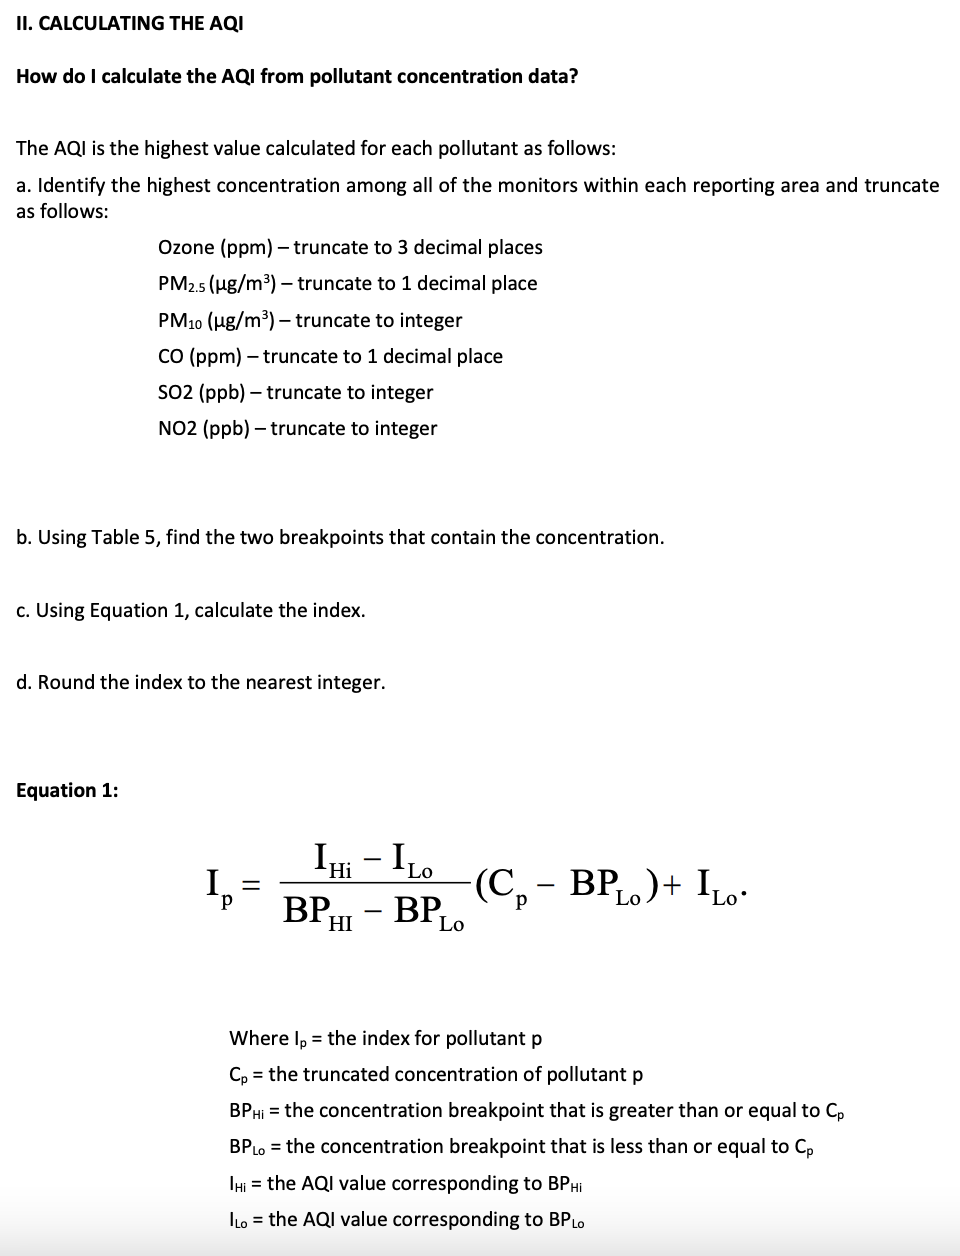



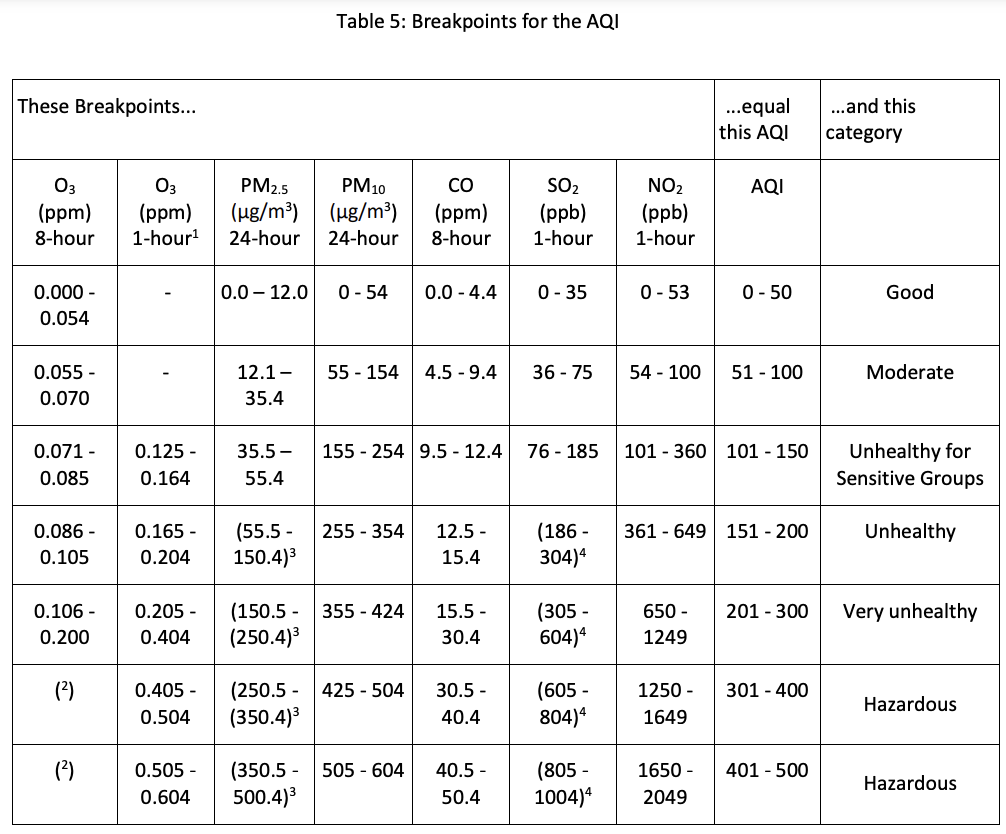

In [42]:
#is SO2_Mean ever larger than SO2 1st Max Value?
(dmv['SO2 Mean'] > dmv['SO2 1st Max Value']).any()

False

In [46]:
#is SO2_Mean ever larger than SO2 1st Max Hour?
(dmv['SO2 Mean'] > dmv['SO2 1st Max Hour']).any()

True

In [47]:
#is SO2_Mean ever larger than SO2 1st Max Hour?
(dmv['SO2 Mean'] > dmv['SO2 1st Max Hour']).value_counts()

False    74946
True     10710
dtype: int64

In [56]:
#percentage from above values
print('Portion of "SO2 Mean values" that are larger than \
corresponding values for "SO2 1st Max Hour":', ((10710 / 74946) * 100), 'percent')

Portion of "SO2 Mean values" that are larger than corresponding values for "SO2 1st Max Hour": 14.290289008085821 percent


In [57]:
#is SO2 1st Max Val ever smaller than SO2 1st Max Hour?
(dmv['SO2 1st Max Value'] < dmv['SO2 1st Max Hour']).any()

True

In [58]:
#is SO2_Mean ever larger than SO2 1st Max Hour?
(dmv['SO2 1st Max Value'] < dmv['SO2 1st Max Hour']).value_counts()

True     61947
False    23709
dtype: int64

In [59]:
#percentage from above values
print('Portion of "SO2 1st Max Hour" that are larger than \
corresponding values for "SO2 1st Max Value":', ((23709 / 61947) * 100), 'percent')

Portion of "SO2 1st Max Hour" that are larger than corresponding values for "SO2 1st Max Value": 38.27303985665165 percent


The 'SO2 Mean' appears to always be a lower value than the value for 'SO2 1st Max Value'. 'SO2 Mean' is only sometimes lower than 'SO2 1st Max Hour', however, there won't be a situation in which 'SO2 Mean' is the largest value of the three, so we can exclude it from our AQI equation.

In [64]:
print(dmv['SO2 1st Max Hour'].max())
print(dmv['SO2 1st Max Value'].max())

23
173.0


In [66]:
#define a formula for calculating SO2 AQI
'''calculate the AQI for SO2'''
def get_so2_aqi(SO2_1st_Max_Val, SO2_1st_Max_Hour): #don't need 'SO2 Mean'
    if SO2_1st_Max_Val > SO2_1st_Max_Hour:
        concentration = SO2_1st_Max_Val
    else: #if they're equal it won't matter, and we know there are no NaNs for these cols
        concentration = SO2_1st_Max_Hour
    if concentration <= 35:
        index_hi = 50
        index_lo = 0
        breakpoint_hi = 35
        breakpoint_lo = 0
    elif concentration > 35 and concentration <= 75:
        index_hi = 100
        index_lo = 51
        bp_hi = 75
        bp_lo = 36
    elif concentration > 75 and concentration <= 185: #this is as high as we need to go
        index_hi = 150
        index_lo = 101
        bp_hi = 185
        bp_lo = 76
    index = ((index_hi-index_lo)/(bp_hi-bp_lo))*(concentration - bp_lo) + index_lo
    return index

In [68]:
#is CO_Mean ever larger than CO 1st Max Value?
(dmv['CO Mean'] > dmv['CO 1st Max Value']).any()

False

In [69]:
#is CO_Mean ever larger than CO 1st Max Hour?
(dmv['CO Mean'] > dmv['CO 1st Max Hour']).any()

True

In [71]:
#is CO_Mean ever larger than CO 1st Max Hour?
(dmv['CO Mean'] > dmv['CO 1st Max Hour']).value_counts()

False    59303
True     26353
dtype: int64

In [74]:
print(dmv['CO 1st Max Hour'].max())
print(dmv['CO 1st Max Value'].max())

23
8.6


In [75]:
#define a formula for calculating CO AQI
'''calculate the AQI for CO'''
def get_co_aqi(CO_1st_Max_Val, CO_1st_Max_Hour): #don't need 'SO2 Mean'
    if CO_1st_Max_Val > CO_1st_Max_Hour:
        concentration = CO_1st_Max_Val
    else: #if they're equal it won't matter, and we know there are no NaNs for these cols
        concentration = CO_1st_Max_Hour
    if concentration <= 4.4:
        index_hi = 50
        index_lo = 0
        breakpoint_hi = 4.4
        breakpoint_lo = 0
    elif concentration > 4.4 and concentration <= 9.4:
        index_hi = 100
        index_lo = 51
        bp_hi = 9.4
        bp_lo = 4.5
    elif concentration > 9.4 and concentration <= 12.4: 
        index_hi = 150
        index_lo = 101
        bp_hi = 12.4
        bp_lo = 9.4
    elif concentration > 12.4 and concentration <= 15.4: 
        index_hi = 200
        index_lo = 151
        bp_hi = 15.4
        bp_lo = 12.4
    elif concentration > 15.5 and concentration <= 30.4: #this is as high as we need to go
        index_hi = 201
        index_lo = 300
        bp_hi = 30.4
        bp_lo = 15.5
    index = ((index_hi-index_lo)/(bp_hi-bp_lo))*(concentration - bp_lo) + index_lo
    return index

NEXT STEPS:

1. split dataframe into with NaNs and without
2. use .apply method to use function on columns you're using
3. then concat the two dataframes back together

In [84]:
#get slice of my dataframe that has NaN for 'SO2 AQI'
dmv_so2_nans = dmv[dmv['SO2 AQI'].isna()]
dmv_so2_nans.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Day of Year,Weekday,Month
39768,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,26.541667,39.0,...,19.0,17,NaN,2.062500,4.1,3,NaN,1,5,1
39769,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-01,26.541667,39.0,...,19.0,17,NaN,2.005263,3.6,5,41.0,1,5,1
39772,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-02,14.958333,22.0,...,11.0,2,NaN,0.658333,2.6,1,NaN,2,6,1
39773,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-02,14.958333,22.0,...,11.0,2,NaN,0.883333,2.1,2,24.0,2,6,1
39776,11,1,41,"420 34th Street N.E.,Washington, DC 20019",District Of Columbia,District of Columbia,Washington,2000-01-03,18.291667,32.0,...,9.6,14,NaN,0.600000,2.4,18,NaN,3,0,1


True